# Homework 3: Introduction to PyTorch

PyTorch is a framework for creating and training neural networks. It's one of the most common neural network libraries, alongside TensorFlow, and is used extensively in both academia and industry. In this homework, we'll explore the basic operations within PyTorch, and we'll design a neural network to classify images.

Let's start by importing the libraries that we'll need:

In [2]:
import torch
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

If you can't import torch, go to www.pytorch.org and follow the instructions there for downloading PyTorch. You can select CUDA Version as None, as we won't be working with any GPUs on this homework.

## PyTorch: Tensors

In PyTorch, data is stored as multidimensional arrays, called tensors. Tensors are very similar to numpy's ndarrays, and they support many of the same operations. We can define tensors by explicity setting the values, using a python list:

In [2]:
A = torch.tensor([[1, 2], [4, -3]])
B = torch.tensor([[3, 1], [-2, 3]])

print("A:")
print(A)

print('\n')

print("B:")
print(B)

A:
tensor([[ 1,  2],
        [ 4, -3]])


B:
tensor([[ 3,  1],
        [-2,  3]])


Just like numpy, PyTorch supports operations like addition, multiplication, transposition, dot products, and concatenation of tensors. Look up and fill in the operations for the following:

In [3]:
print("Sum of A and B:")
### YOUR CODE HERE

print(A+B)
print()
print("Elementwise product of A and B:")
### YOUR CODE HERE

print(A * B)
print()
print("Matrix product of A and B:")
### YOUR CODE HERE

print(A.mm(B))
print(A@B)
print()
print("Transposition of A:")
### YOUR CODE HERE
print(torch.t(A))
print('\n')

print("Concatenation of A and B in the 0th dimension:")
### YOUR CODE HERE
print(torch.cat((A,B), dim=0))
print('\n')

print("Concatenation of A and B in the 1st dimension:")
### YOUR CODE HERE
print(torch.cat((A,B),dim=1))

Sum of A and B:
tensor([[4, 3],
        [2, 0]])

Elementwise product of A and B:
tensor([[ 3,  2],
        [-8, -9]])

Matrix product of A and B:
tensor([[-1,  7],
        [18, -5]])
tensor([[-1,  7],
        [18, -5]])

Transposition of A:
tensor([[ 1,  4],
        [ 2, -3]])


Concatenation of A and B in the 0th dimension:
tensor([[ 1,  2],
        [ 4, -3],
        [ 3,  1],
        [-2,  3]])


Concatenation of A and B in the 1st dimension:
tensor([[ 1,  2,  3,  1],
        [ 4, -3, -2,  3]])


PyTorch also has tools for creating large tensors automatically, without explicity specifying the values. Find the corresponding tensor initialzers and fill in below. Your print statements should look like the following:

3x4x5 Tensor of Zeros:
```
tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
```


5x5 Tensor with random elements sampled from a standard normal distrubtion: (these should be randomly generated values)
```
tensor([[ 0.2850,  0.5033, -1.8570, -1.6525,  0.3613],
        [-0.7505,  0.4573, -0.2454,  0.1668,  0.7241],
        [ 0.2976,  0.9827, -0.4879, -1.1144, -1.8235],
        [-0.0264,  0.7341, -0.2235,  0.5306,  0.8385],
        [ 0.2740,  0.3522, -0.5244, -0.1132,  0.5135]])
```

Tensor created from a range:
```
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```


In [4]:
print("3x4x5 Tensor of Zeros:")
### YOUR CODE HERE
v = torch.zeros(3,4,5)
print(v)
print()

print("5x5 Tensor with random elements sampled from a standard normal distrubtion:")
### YOUR CODE HERE

print('\n')
v = torch.randn(3,4,5)
print(v)
print("Tensor created from a range:")
### YOUR CODE HERE
v = torch.arange(10)
print(v)


3x4x5 Tensor of Zeros:
tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

5x5 Tensor with random elements sampled from a standard normal distrubtion:


tensor([[[ 0.8472, -0.5487,  0.5441, -0.4143,  0.3530],
         [-2.3684, -1.3495, -1.4362,  0.4495,  0.7653],
         [-0.4588, -1.2766, -1.1046,  0.6433, -0.4041],
         [-0.9070, -0.8848, -0.7742,  0.9715,  0.1811]],

        [[ 0.7950, -0.6463,  0.6498, -1.6940, -1.7301],
         [ 0.4800, -0.3126, -0.9792, -0.7225, -0.9661],
         [-0.2768,  0.3816, -0.1800, -0.9100,  0.5326],
         [-0.3087,  2.5587, -0.5301,  1.4236, -0.1230]],

        [[-1.1625,  1.1921,  0.2033, -0.1160,  1.8042],
         [ 0

Now, use PyTorch tensors to complete the following computation:

Create a tensor of integers from the range 0 to 99, inclusive. Add 0.5 to each element in the tensor, and square each element of the result. Then, negate each element of the tensor, and apply the exponential to each element (i.e., change each element x into e^x). Now, sum all the elements of the tensor. Multiply this tensor by 2 and square each element and print your result.

If you're right, you should get something very close to $$\pi \approx 3.14 .$$

In [5]:
val = torch.arange(100).float()
val+=0.5 #Adds 0.5 to each element
#val = val*val #Multiply element wise
val = torch.pow(val,2)
val *= -1 #Negate (times -1)
torch.exp_(val) #Inplace for exp^x
val=torch.sum(val)*2
val=torch.pow(val,2)

### YOUR CODE HERE

print(val)

tensor(3.1409)


Now we'll try writing a computation that's prevalent throughout a lot of deep learning algorithms - calculating the softmax function:
$$softmax(x_i) = \frac{e^{x_i}}{\sum_{j = 0}^{n - 1} e^{x_j}}$$
Calculate the softmax function for the $val$ tensor below where $n$ is the number of elements in $val$, and $x_i$ is each element in $val$. DO NOT use the built-in softmax function. We should end up with a tensor that represents a probability distribution that sums to 1. (hint: you should calculate the sum of the exponents first)

In [6]:
val1 = torch.arange(10).float()
num = torch.exp(val1)
denum = torch.exp(val1).sum()
result1=num/denum

### YOUR CODE HERE

print(result1)
print(torch.sum(result1))

tensor([0.0001, 0.0002, 0.0006, 0.0016, 0.0043, 0.0116, 0.0315, 0.0856, 0.2326,
        0.6321])
tensor(1.0000)


To do this, you'll need to use the PyTorch documentation at https://pytorch.org/docs/stable/torch.html. Luckily, PyTorch has very well-written docs.

## PyTorch: Autograd

Autograd is PyTorch's automatic differentiation tool: It allows us to compute gradients by keeping track of all the operations that have happened to a tensor. In the context of neural networks, we'll interpret these gradient calculations as backpropagating a loss through a network.

To understand how autograd works, we first need to understand the idea of a __computation graph__. A computation graph is a directed, acyclic graph (DAG) that contains a blueprint of a sequence of operations. For a neural network, these computations consist of matrix multiplications, bias additions, ReLUs, softmaxes, etc. Nodes in this graph consist of the operations themselves, while the edges represent tensors that flow forward along this graph.

In PyTorch, the creation of this graph is __dynamic__. This means that tensors themselves keep track of their own computational history, and this history is build as the tensors flow through the network; this is unlike TensorFlow, where an external controller keeps track of the entire computation graph. This dynamic creation of the computation graph allows for lots of cool control-flows that are not possible (or at least very difficult) in TensorFlow.

![alt text](https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/dynamic_graph.gif)
<center>_Dynamic computation graphs are cool!_</center>
_ _

Let's take a look at a simple computation to see what autograd is doing. First, let's create two tensors and add them together. To signal to PyTorch that we want to build a computation graph, we must set the flag requires_grad to be True when creating a tensor.

In [7]:
a = torch.tensor([1, 2], dtype=torch.float, requires_grad=True)
b = torch.tensor([8, 3], dtype=torch.float, requires_grad=True)

c = a + b

Now, since a and b are both part of our computation graph, c will automatically be added:

In [8]:
c.requires_grad

True

When we add a tensor to our computation graph in this way, our tensor now has a grad_fn attribute. This attribute tells autograd how this tensor was generated, and what tensor(s) this particular node was created from.

In the case of c, its grad_fn is of type AddBackward1, PyTorch's notation for a tensor that was created by adding two tensors together:

In [9]:
c.grad_fn

Every grad_fn has an attribute called next_functions: This attribute lets the grad_fn pass on its gradient to the tensors that were used to compute it.

In [10]:
c.grad_fn.next_functions

((<AccumulateGrad at 0x1d9d6c54f60>, 0),
 (<AccumulateGrad at 0x1d9d6c549e8>, 0))

If we extract the tensor values corresponding to each of these functions, we can see a and b! 

In [11]:
print(c.grad_fn.next_functions[0][0].variable)
print(c.grad_fn.next_functions[1][0].variable)

tensor([1., 2.], requires_grad=True)
tensor([8., 3.], requires_grad=True)


In this way, autograd allows a tensor to record its entire computational history, implicitly creating a computational graph -- All dynamically and on-the-fly!

## PyTorch: Modules and Parameters

In PyTorch, collections of operations are encapsulated as __modules__. One way to visualize a module is to take a section of a computational graph and collapse it into a single node. Not only are modules useful for encapsulation, they have the ability to keep track of tensors that are contained inside of them: To do this, simply wrap a tensor with the class torch.nn.Parameter.

To define a module, we must subclass the type torch.nn.Module. In addition, we must define a _forward_ method that tells PyTorch how to traverse through a module.

For example, let's define a logistic regression module. This module will contain two parameters: The weight vector and the bias. Calling the _forward_ method will output a probability between zero and one.

In [12]:
class LogisticRegression(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.weight = nn.Parameter(torch.randn(10))
        self.bias = nn.Parameter(torch.randn(1))
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, vector):
        return self.sigmoid(torch.dot(vector, self.weight) + self.bias)
        

Note that we have fixed the dimension of our weight to be 10, so our module will only accept 10-dimensional data.

We can now create a random vector and pass it through the module:

In [13]:
module = LogisticRegression() #Creates instance of model
vector = torch.randn(10) #Create a torch tensor from normal distribution of size 10
output = module(vector) #Fit data to model

In [14]:
output 

tensor([0.9905], grad_fn=<SigmoidBackward>)

Now, say that our loss function is mean-squared-error and our target value is 1. We can then write our loss as:

In [15]:
loss = (output - 1) ** 2 #We assume target value is 1. Thus we want to minimize it. Must Square to evade negative values

In [16]:
loss

tensor([0.0001], grad_fn=<PowBackward0>)

To minimize this loss, we just call loss.backward(), and all the gradients will be computed for us! Note that wrapping a tensor as a Parameter will automatically set requires_grad = True.

In [17]:
loss.backward() #Calculate the backward gradients to minimize the loss

In [18]:
print(module.weight.grad)
print(module.bias.grad)

tensor([ 0.0001,  0.0003,  0.0001,  0.0002, -0.0002, -0.0003, -0.0000,  0.0003,
        -0.0001, -0.0001])
tensor([-0.0002])


## Fully-connected Networks for Image Classification

Using this knowledge, you will create a neural network in PyTorch for image classification on the CIFAR-10 dataset. PyTorch uses the $DataLoader$ class for you to load data into batches to feed to your learning algorithms - we highly suggest you familiarze yourself with this as well as the Dataset API here: https://pytorch.org/docs/stable/data.html. Fill in the below code to instantiate 3 DataLoaders for your training, validation and test sets. We would prefer that you NOT use the `torchvision.transform` API - we want you to get some practice in data preprocessing! Here are the transformations we want you to perform:
1. Split the `val_and_test_set` into two separate datasets (each with 5000 elements)
2. Convert all the `np.array` elements into `torch.tensor` elements.
3. All values will be pixel values in our images are in the range of [0, 256]. Normalize this so that each pixel is in the range [0, 1].
3. Flatten all images. All your images will be of shape (32, 32, 3), we need them as flat (32 * 32 * 3) size tensors as input to our neural network.
4. Load everything into a DataLoader. (check how this works in the PyTorch docs!) 

Be sure to have the options `shuffle=True` (so that your dataset is shuffled so that samples from the dataset are not correlated) and also `batch_size=32` or larger. This is a standard minibatch size. If you're curious about what batch size does (and are somewhat familiar with statistics), here's a great answer https://stats.stackexchange.com/questions/316464/how-does-batch-size-affect-convergence-of-sgd-and-why.

In [76]:
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from scipy.misc import imshow
import torch.optim as optim
from torchvision import datasets
from torch.autograd import Variable

# Documentation Transform

## transform.ToTensor() :
Converts a PIL Image or np.ndarray to a tensor
Flattens to (CxHxW) = (32x32x3) (32x32 for each color (RBG))
Transform data [0-255] to [0-1]

## transform.Normalize()
(Mean),(Standard Deviation)
image = (image - mean) / std

In [24]:
#transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.CIFAR10(root='./data', train=True, download=True) #50k Data
val_and_test_set =datasets.CIFAR10(root='./data', train=False, download=True) #10k data

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#Transform PIL Image to Np Arrays. Since we want to modify the original data, use np.asarray instead of np.array

In [48]:
#Transform into an array, divides by 255 to normalize. 
train = [(np.asarray(image)/255, target) for image,target in trainset]
valtest = [(np.asarray(image)/255, target) for image,target in val_and_test_set]
#train[0][0][1]

# Note to self:
Use Torch Command .view to reshape the inputs.
We do not care of what our original interval may be, the weight does the job.
Shuffle True --> Data reshuffled at each epoch

In [49]:
#Splits data into 2 equal set.
val = valtest[:5000]
test=valtest[5000:]
#val[0][1]

In [55]:
#Transform all to torch.tensors
TrainT=[(torch.tensor(image),torch.tensor(target)) for image, target in train]
valT=[(torch.tensor(image),torch.tensor(target)) for image, target in val]
testT=[(torch.tensor(image),torch.tensor(target)) for image, target in test]

In [57]:
#Load Data to pytorch data loader. 
trainloader=torch.utils.data.DataLoader(TrainT, batch_size=32, shuffle=True)
valloader=torch.utils.data.DataLoader(valT, batch_size=32, shuffle=True)
testloader=torch.utils.data.DataLoader(testT, batch_size=32, shuffle=True)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

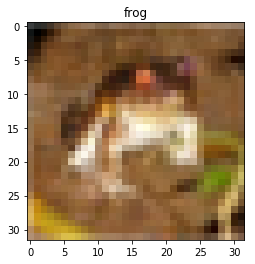

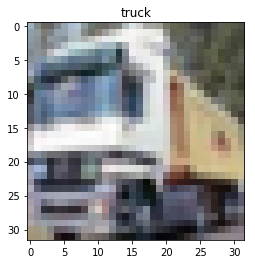

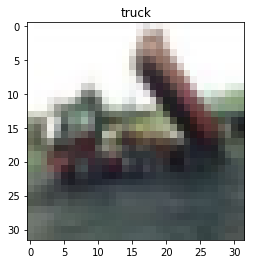

In [68]:
for x,y in TrainT[:3]:
    plt.title(classes[y])
    plt.imshow(x)
    plt.show()

# Whatever is under this point is left to demistefy 

In [82]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
        self.relu = nn.ReLU()                          # Non-Linear ReLU Layer: max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [83]:
EPOCHS = 50
LEARNING_RATE = 0.001
INPUT_SIZE = 32*32*3
HIDDEN_SIZE = 500
OUTPUT_SIZE = 10

net = Net(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)

In [84]:
%%time
for epoch in range(EPOCHS):
    
    total_loss = 0
    
    for images, labels in trainloader:
                
        ### YOUR CODE HERE - Zero gradients, call .backward(), and step the optimizer.
        images=images.view(images.shape[0],-1).float()
        images.require_grad=True
        optimizer.zero_grad()
        outputs = net(images)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
                
        total_loss += loss.item()
        
    average_loss = total_loss / len(trainloader)
    
    ### Calculate validation accuracy here by iterating through the validation set.
    ### We use torch.no_grad() here because we don't want to accumulate gradients in our function.
    with torch.no_grad():
        correction=0.0
        for images,labels in valloader:
            images=images.view(images.shape[0],-1).float()
            val_output = net(images)
            val_output = torch.argmax(val_output.reshape(val_output.shape[0], -1), dim=1)
            correction += torch.sum(val_output == labels).item() / float(val_output.shape[0])
        val_acc=correction/len(valloader)
    print("(epoch, train_loss, val_acc) = ({0}, {1}, {2})".format(epoch, average_loss, val_acc))


(epoch, train_loss, val_acc) = (0, 1.8508871861626839, 0.4030652866242038)
(epoch, train_loss, val_acc) = (1, 1.6885500649039134, 0.41162420382165604)
(epoch, train_loss, val_acc) = (2, 1.6208200575217786, 0.44705414012738853)
(epoch, train_loss, val_acc) = (3, 1.5729778833062849, 0.4578025477707006)
(epoch, train_loss, val_acc) = (4, 1.5452826585971005, 0.4609872611464968)
(epoch, train_loss, val_acc) = (5, 1.5205885940305865, 0.4482484076433121)
(epoch, train_loss, val_acc) = (6, 1.5058570129323754, 0.46894904458598724)
(epoch, train_loss, val_acc) = (7, 1.4879329640439742, 0.44227707006369427)
(epoch, train_loss, val_acc) = (8, 1.4746476870962084, 0.4635748407643312)
(epoch, train_loss, val_acc) = (9, 1.458981120960116, 0.46636146496815284)
(epoch, train_loss, val_acc) = (10, 1.4443499500447943, 0.4653662420382166)
(epoch, train_loss, val_acc) = (11, 1.4370700250202773, 0.4898487261146497)
(epoch, train_loss, val_acc) = (12, 1.4212125585922735, 0.4888535031847134)
(epoch, train_loss

In [85]:
%%time
with torch.no_grad():
    correction=0.0
    for images,labels in testloader:
        images=images.view(images.shape[0],-1).float()
        test_output = net(images)
        test_output = torch.argmax(test_output.reshape(test_output.shape[0], -1), dim=1)
        correction += torch.sum(test_output == labels).item() / float(test_output.shape[0])
    test_acc=correction/len(testloader)
    print("Test accuracy:", test_acc)

Test accuracy: 0.4755175159235669
Wall time: 4.25 s


# End of assignment. I still have a bug in my code downthere. Will try to keep on debugging

# Questions:

1. In the given example, what if we wanted to make our target value 0, what would we do? loss = 0?
1. Why are we dividing by 256 and not 255?
3. What is the num_workers in pytorch.DataLoader? What are sub-processes?
4. Is it normal it takes that long?


In [ ]:
https://colab.research.google.com/drive/1jxUPzMsAkBboHMQtGyfv5M5c7hU8Ss2c#scrollTo=qBrGa7qMJKcB
https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py#L154

Files already downloaded and verified
Files already downloaded and verified


### Now I think I understood, but please correct me if I am wrong. torchvision.datasets is image, label. The image is a 3D array, with 32 rows, 32 columns, 3 depth? and the labe is one of the image

In [27]:
#trainset = [(np.asarray(image) / 256, label) for image, label in trainset] #This normalizes the data to [0,256]
#val_and_test_set = [(np.asarray(image) / 256, label) for image, label in trainset] #This normalizes the data to [0,256]
#val=val_and_test_set[:5000] #0-4999 are valset
#test=val_and_test_set[5000:]#5000-9999 are test set.

#trainset=[(torch.tensor(image.reshape(1,-1)), torch.tensor(label)) for image,label in trainset] #reshapes, -1 means TBD size
#val=[(torch.tensor(image.reshape(1,-1)),torch.tensor(label)) for image, label in val]
#test=[(torch.tensor(image.reshape(1,-1)), torch.tensor(label)) for image,label in test]
### YOUR CODE HERE

trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=32)
valloader = torch.utils.data.DataLoader(val_and_test_set, shuffle=True, batch_size=32)
#testloader = torch.utils.data.DataLoader(test, shuffle=True, batch_size=32)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

CIFAR-10 consists of 32 x 32 color images, each corresponding to a unique class indicating the object present within the image. Use Matplotlib to print out the first few images.

In [ ]:
for image, label in trainset[:4]:
    x=image
    plt.title(classes[label])
    plt.imshow(x.reshape(32,32,-1))
    plt.show()

Now try to build and train a plain neural network that properly classifies images in the CIFAR-10 dataset. Try to achieve at least around 40% accuracy (the higher the better!).

Take a look at the PyTorch documentation for some help in how to do this.

Google is your friend -- Looking things up on the PyTorch docs and on StackOverflow will be helpful.

https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):

        super().__init__()
        self.conv1 = nn.Conv2d(input_dim, hidden_dim, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(hidden_dim, output_dim, 5)
        self.fc1 = nn.Linear(output_dim*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, output_dim * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

        

In [30]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [31]:
EPOCHS = 10
LEARNING_RATE = 0.01
INPUT_SIZE = 32*32*3
HIDDEN_SIZE = 5

#are there specfic values for the above? or is it just purely random

OUTPUT_SIZE = 10

#net = Net(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
net=Net()
### Define an optimizer and a loss function here. We pass our network parameters to our optimizer here so we know
### which values to update by how much.
optimizer = optim.Adam(net.parameters(),lr=LEARNING_RATE)
loss_fn = nn.CrossEntropyLoss()

print(net)

for epoch in range(EPOCHS):
    
    total_loss = 0
    
    for images, labels in trainloader:
                
        ### YOUR CODE HERE - Zero gradients, call .backward(), and step the optimizer.\
        optimizer.zero_grad()
        outputs = net(images)
        loss = loss_fn(outputs, label)
        loss.backward()
        optimizer.step()
        
    ### Calculate validation accuracy here by iterating through the validation set.
    ### We use torch.no_grad() here because we don't want to accumulate gradients in our function.
    with torch.no_grad():
        for images, labels in valloader:
            outputs = net(images)
            predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        val_acc = 100*correct/total
    
    print("(epoch, train_loss, val_acc) = ({0}, {1}, {2})".format(epoch, average_loss, val_acc))


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


RuntimeError: dimension specified as 0 but tensor has no dimensions

In [ ]:
### YOUR CODE HERE - Here, we test the overall accuracy of our model.
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print("Test accuracy:", test_acc)

## Submission
For submiting, please download this notebook as a `.py` file. To do so, click on `File -> Download as -> Python (.py)`. Put the downloaded `assignment3.py` into this folder and commit the file.

## Additional Resources
If you're interested in using PyTorch as a framework for deep learning (especially for your final projects! We highly recommend you use this!), check out the PyTorch tutorials: https://pytorch.org/tutorials/. They have tutorials for everything from image to text to reinforcement learning tasks.